In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# get data
import RGC_Flicker
#from RGC_Flicker import get_flicker
reload(RGC_Flicker)
X_train, y_train, X_val, y_val, X_test, y_test = RGC_Flicker.get_flicker(num_classes=1)

Train on 37000 samples, validate on 5000 samples
Epoch 1/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 2/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 3/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 4/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 5/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 6/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 7/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 8/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1.0000 - val_mean_squared_error: 0.8838
Epoch 9/15
5s - loss: 1.0000 - mean_squared_error: 0.8769 - val_loss: 1

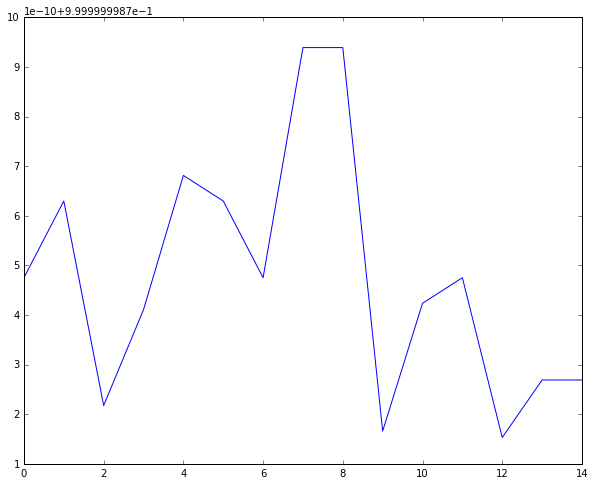

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.regularizers import l2, activity_l2
from keras.layers import Convolution1D
from keras.optimizers import RMSprop
import time 

stim_bin = 20
num_classes = 1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
val_data = X_val, y_val

model = Sequential()
model.add(Convolution1D(64, 3, border_mode='same', input_dim=1, input_length=20))
model.add(Convolution1D(32, 3, border_mode='same'))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(output_dim=num_classes))
model.add(Activation("softmax"))

model.compile(loss='poisson', optimizer='SGD', metrics=['mean_squared_error'])
hist = model.fit(X_train, y_train, nb_epoch=15, batch_size=32, verbose=2, validation_data=val_data)
time.sleep(.1)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=100)
plt.plot(hist.history['loss'])


In [10]:
print loss_and_metrics
print -np.log(loss_and_metrics[1]) * X_test.shape[0]

[1.0, 0.8798095237641107]
1344.52337467
